# Bathymetry

In [1]:
#directory paths
_work_dir='/g/data/gv90/as2285/miz/'
_data_dir='/g/data/gv90/P6_data/'

In [2]:
import xarray as xr
import odc.geo.xr
from dea_tools.spatial import subpixel_contours
from affine import Affine
from datacube.utils.cog import write_cog
import numpy as np

In [3]:
bathy_ds=xr.open_mfdataset([f'{_data_dir}IBCSO/IBCSO_v2_ice-surface.nc'])

In [4]:
bathy_ds=bathy_ds.odc.assign_crs("epsg:9354")

In [6]:
bathy_ds.z

<xarray.DataArray 'z' (y: 19200, x: 19200)>
dask.array<open_dataset-646c3b9f6bde4c1cc1abb7f4aad7da19z, shape=(19200, 19200), dtype=float32, chunksize=(19200, 19200), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 -4.8e+06 -4.799e+06 ... 4.799e+06 4.8e+06
  * y            (y) float64 -4.8e+06 -4.799e+06 ... 4.799e+06 4.8e+06
    spatial_ref  int32 9354
Attributes:
    long_name:     elevation
    grid_mapping:  polar_stereographic
    units:         m

# Regrid to 5km and NSIDC Projection

In [7]:
src_geobox=bathy_ds.odc.geobox

In [8]:
map_geobox = odc.geo.geobox.GeoBox.from_bbox(
    [-4500000,-4500000,4500000,4500000],
    "epsg:3976",
    resolution=5000
    )

In [9]:
newNd = np.ndarray([1800,1800])

In [10]:
downsample = odc.geo.xr.rio_reproject(
        bathy_ds.z,
        newNd,
        src_geobox,
        map_geobox,
        'bilinear',
    )

In [11]:
downsample_da=odc.geo.xr.wrap_xr(
        downsample,
        map_geobox
    )

In [27]:
write_cog(
    downsample_da,
    f'{_data_dir}/tracker_data/bathymetry.tiff',
    overwrite=True
)

PosixPath('/g/data/jk72/MIZ/tracker_data/bathymetry.tiff')

In [28]:
downsample_da.odc.geobox.extent.exterior.to_crs("epsg:4326").points[:3]

[(-45.0, -35.58352463367147),
 (-135.0, -35.58352463367147),
 (135.0, -35.58352463367147)]

# Some contours

In [24]:
    
lines=subpixel_contours(downsample_da.load(), z_values=[-500,-1000,-2000,-4000], min_vertices=30, crs='epsg:3976')

<AxesSubplot:>

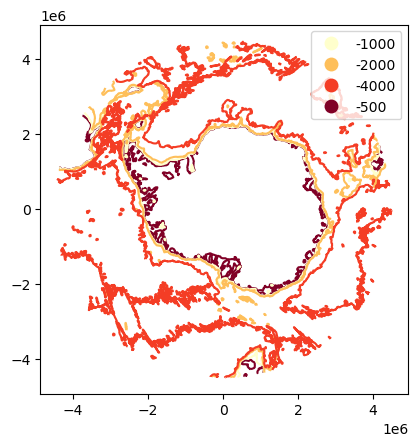

In [25]:
lines.plot(column='z_value', cmap='YlOrRd', legend=True)